In [10]:
!pip install yfinance




[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: C:\Users\ediso\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


  Using cached yfinance-0.2.28-py2.py3-none-any.whl (65 kB)
     ---------------------------------------- 0.0/143.0 kB ? eta -:--:--
     -------------------------------------- 143.0/143.0 kB 4.1 MB/s eta 0:00:00
  Using cached requests-2.31.0-py3-none-any.whl (62 kB)
  Using cached multitasking-0.0.11-py3-none-any.whl (8.5 kB)
     ---------------------------------------- 0.0/3.8 MB ? eta -:--:--
     ---- ----------------------------------- 0.5/3.8 MB 14.2 MB/s eta 0:00:01
     ------------ --------------------------- 1.2/3.8 MB 15.1 MB/s eta 0:00:01
     ------------------ --------------------- 1.7/3.8 MB 13.8 MB/s eta 0:00:01
     ---------------------- ----------------- 2.1/3.8 MB 12.3 MB/s eta 0:00:01
     ----------------------------- ---------- 2.7/3.8 MB 12.5 MB/s eta 0:00:01
     -------------------------------------- - 3.6/3.8 MB 13.7 MB/s eta 0:00:01
     ---------------------------------------- 3.8/3.8 MB 12.7 MB/s eta 0:00:00
  Using cached html5lib-1.1-py2.py3-none-any.w

In [38]:
import pandas as pd
import yfinance as yf
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [51]:
tickers = ['TSLA','AAPL']

data = pd.DataFrame()
for t in tickers:
     data[t]=tickers_data=yf.download(t, start="2017-01-01", progress=False)['Adj Close']
  
display(data)    

,TSLA,AAPL
Date,,
2017-01-03,14.466000,27.059307
2017-01-04,15.132667,27.029026
2017-01-05,15.116667,27.166470
2017-01-06,15.267333,27.469336
2017-01-09,15.418667,27.720940
...,...,...
2023-08-29,257.179993,184.119995
2023-08-30,256.899994,187.649994
2023-08-31,258.079987,187.869995


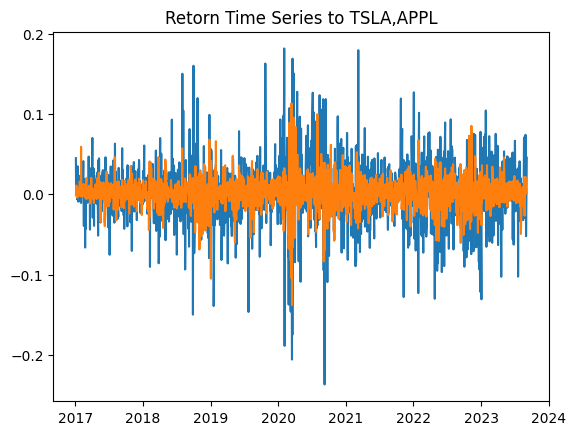

<Axes: >

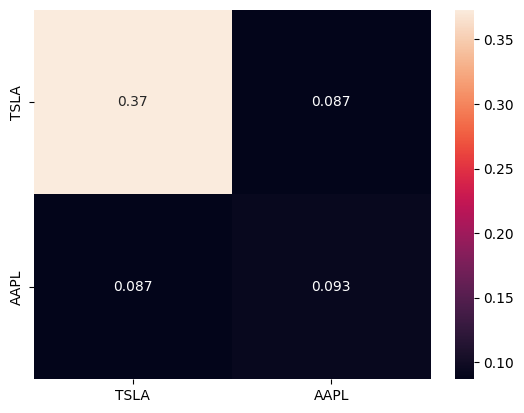

In [53]:
log_returns = np.log(1 + data.pct_change())
cov = log_returns.cov()*252
fig, ax = plt.subplots()
ax.plot(log_returns.index,log_returns.values)
plt.title("Retorn Time Series to TSLA,APPL")
plt.show()
sns.heatmap(cov,linecolor="white",robust=False,fmt=".2g",annot=True)

In [54]:
cov_with_market = cov.iloc[0,1]
market_var = log_returns['AAPL'].var()*252
stock_beta = cov_with_market / market_var

In [56]:
riskfree = 0.0095
riskpremium = (log_returns['AAPL'].mean()*252) - riskfree

stock_capm_return = riskfree + stock_beta * riskpremium
sharpe_stock = (stock_capm_return - riskfree) /(log_returns['TSLA'].std()*252**0.5)

In [57]:
print("La Beta de " + str(tickers) + " es de: " + str(round(stock_beta,3)))
print("El retorno CAPM de " + str(tickers) + " es de: " + str(round(stock_capm_return*100,3))+"%")
print("El Ratio Sharpe de " + str(tickers) + " es de: " + str(round(sharpe_stock,3)))

La Beta de ['TSLA', 'AAPL'] es de: 0.93
El retorno CAPM de ['TSLA', 'AAPL'] es de: 27.259%
El Ratio Sharpe de ['TSLA', 'AAPL'] es de: 0.431
